# LOWER-UPPER BOUNDS

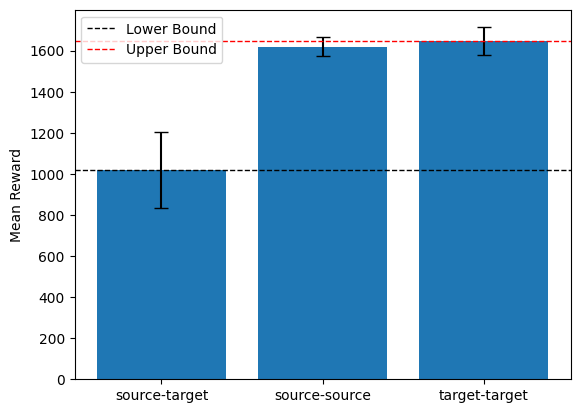

In [62]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

test_log_dir = os.path.join(os.getcwd(), "test_logs")
lower_bound = os.path.join(test_log_dir, "ppo_source_test_on_target.txt")
upper_bound = os.path.join(test_log_dir, "ppo_target_test_on_target.txt")
source_source = os.path.join(test_log_dir, "ppo_source_test_on_source.txt")
file_paths = [lower_bound, source_source, upper_bound]
test_mean = []
test_var =  []


for i in range(len(file_paths)):
    file = open(file_paths[i], 'r')
    content = file.read()
    test_mean.append(re.search(r'\d+\.\d+', content.split("\n")[2]).group())
    test_var.append(re.search(r'\d+\.\d+', content.split("\n")[3]).group())
    file.close()

test_mean = [float(x) for x in test_mean]
test_var = [float(x) for x in test_var]
h = len(test_mean)

labels = ['source-target', 'source-source', 'target-target']
LOWER_BOUND = test_mean[0]
UPPER_BOUND = test_mean[2]
plt.bar( range(h), test_mean, tick_label=labels, yerr=test_var, capsize=5, color=['tab:blue', 'tab:blue', 'tab:blue'])
plt.axhline(y=LOWER_BOUND, color='black', linestyle='--', linewidth=1, label='Lower Bound')
plt.axhline(y=UPPER_BOUND, color='red', linestyle='--', linewidth=1, label='Upper Bound')

# plt.title('sim-to-real bounds')
plt.ylabel('Mean Reward')
plt.yticks()
plt.legend()

plt.show()


# UDR (BLU TEST - AZZURRO TARGET)

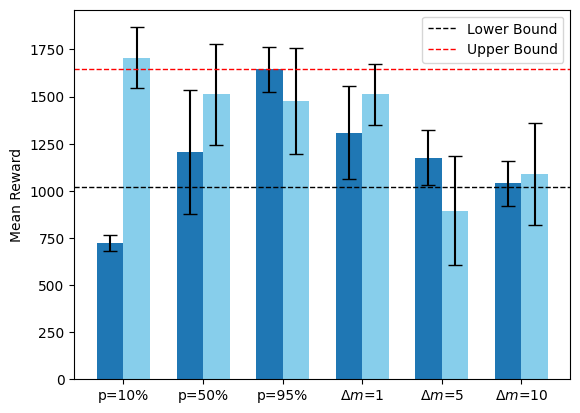

In [63]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

test_log_dir = os.path.join(os.getcwd(), "test_logs")
file_paths = [
    os.path.join(test_log_dir, "ppo_udr_0-1_0-1_0-1_perc_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_0-1_0-1_0-1_perc_test_on_udr_0-1_0-1_0-1_perc.txt"),
    os.path.join(test_log_dir, "ppo_udr_0-5_0-5_0-5_perc_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_0-5_0-5_0-5_perc_test_on_udr_0-5_0-5_0-5_perc.txt"),
    os.path.join(test_log_dir, "ppo_udr_0-95_0-95_0-95_perc_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_0-95_0-95_0-95_perc_test_on_udr_0-95_0-95_0-95_perc.txt"),
    os.path.join(test_log_dir, "ppo_udr_1-0_1-0_1-0_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_1-0_1-0_1-0_test_on_udr_1-0_1-0_1-0.txt"),
    os.path.join(test_log_dir, "ppo_udr_10-0_10-0_10-0_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_10-0_10-0_10-0_test_on_udr_10-0_10-0_10-0.txt"),
    os.path.join(test_log_dir, "ppo_udr_5-0_5-0_5-0_test_on_target.txt"),
    os.path.join(test_log_dir, "ppo_udr_5-0_5-0_5-0_test_on_udr_5-0_5-0_5-0.txt")
]
test_mean, train_mean = [], []
test_var , train_var = [], []
height, var = [], []

for i in range(len(file_paths)):
    file = open(file_paths[i], 'r')
    content = file.read()

    height.append(re.search(r'\d+\.\d+', content.split("\n")[2]).group())
    var.append(re.search(r'\d+\.\d+', content.split("\n")[3]).group())

    file.close()
h = len(height) 

height = [float(x) for x in height]
var = [float(x) for x in var]

# plot
color = ['skyblue' if i % 2 else 'tab:blue' for i in range(h*2)]
w = 1

plt.bar( [0,1*w,3*w,4*w,6*w,7*w,9*w,10*w,12*w,13*w,15*w,16*w], height, yerr=var, capsize=5, color=color, width=w)

plt.axhline(y=LOWER_BOUND, color='black', linestyle='--', linewidth=1, label='Lower Bound')
plt.axhline(y=UPPER_BOUND, color='red', linestyle='--', linewidth=1, label='Upper Bound')

plt.ylabel('Mean Reward')
plt.yticks()
plt.xticks([0.5,3.5,6.5,9.5,12.5,15.5],['p=10%','p=50%','p=95%',r'$\Delta m$=1',r'$\Delta m$=5',r'$\Delta m$=10'])
plt.legend()

plt.show()


In [64]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import numpy as np
import csv

def plot_train_reward(file, plot=False):
    with open(file, newline="", encoding="ISO-8859-1") as filecsv:
        lettore = csv.reader(filecsv,delimiter=";")
        next(lettore) #skip header
        next(lettore)
        reward = []
        mean_reward = []
        for i, row in enumerate(lettore):
            r = float(row[0].split(',')[0])
            reward.append(r)
            r_mean = np.mean(reward[max(0, i-200):])
            mean_reward.append(r_mean)
    if plot:
        plt.plot(reward, label='reward')
        plt.plot(mean_reward, label='mean reward')
        plt.legend()
        plt.show()

    return reward, mean_reward, len(reward)


train_log_dir = os.path.join(os.getcwd(), "train_logs")
file = os.path.join(train_log_dir, "ppo_source.monitor.csv")

# _ = plot_train_reward(file, True)   

# HYPERPARAMETERS TUNING

In [65]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

test_log_dir = os.path.join(os.getcwd(), "hyperparams_tuning/logs")
file_paths = [
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.5.monitor.csv"),#0
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.75.monitor.csv"),#1
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.9.monitor.csv"),#2
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.99.monitor.csv"),#3
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.99_0.monitor.csv"),#4
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.99_1.monitor.csv"),#5
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.99_2.monitor.csv"),#6
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.99_3.monitor.csv"),#7
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.99_4.monitor.csv"),#8
    os.path.join(test_log_dir, "ppo_source_lr0.003_gamma0.5.monitor.csv"),#9
    os.path.join(test_log_dir, "ppo_source_lr0.003_gamma0.75.monitor.csv"),#10
    os.path.join(test_log_dir, "ppo_source_lr0.003_gamma0.9.monitor.csv"),#11
    os.path.join(test_log_dir, "ppo_source_lr0.003_gamma0.99.monitor.csv"),#12
    os.path.join(test_log_dir, "ppo_source_lr3e-05_gamma0.5.monitor.csv"),#13
    os.path.join(test_log_dir, "ppo_source_lr3e-05_gamma0.75.monitor.csv"),#14
    os.path.join(test_log_dir, "ppo_source_lr3e-05_gamma0.9.monitor.csv"),#15
    os.path.join(test_log_dir, "ppo_source_lr3e-05_gamma0.99.monitor.csv"),#16
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.5.monitor.csv"),#17
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.75.monitor.csv"),#18
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.9.monitor.csv"),#19
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.99.monitor.csv"),#20
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.99_0.monitor.csv"),#21
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.99_1.monitor.csv"),#22
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.99_2.monitor.csv"),#23
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.99_3.monitor.csv"),#24
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.99_4.monitor.csv"),#25
    os.path.join(test_log_dir, "ppo_source_lrlin_scheduler_gamma0.5.monitor.csv"),#26
    os.path.join(test_log_dir, "ppo_source_lrlin_scheduler_gamma0.75.monitor.csv"),#27
    os.path.join(test_log_dir, "ppo_source_lrlin_scheduler_gamma0.9.monitor.csv"),#28
    os.path.join(test_log_dir, "ppo_source_lrlin_scheduler_gamma0.99.monitor.csv"),#29
    os.path.join(test_log_dir, "ppo_source_lrstep_scheduler_gamma0.5.monitor.csv"),#30
    os.path.join(test_log_dir, "ppo_source_lrstep_scheduler_gamma0.75.monitor.csv"),#31
    os.path.join(test_log_dir, "ppo_source_lrstep_scheduler_gamma0.9.monitor.csv"),#32
    os.path.join(test_log_dir, "ppo_source_lrstep_scheduler_gamma0.99.monitor.csv")#33
]

rewards = []
mean_rewards = []
len_rewards = []
for i in range(len(file_paths)):
    reward, mean_reward, len_reward = plot_train_reward(file_paths[i])
    rewards.append(reward)
    mean_rewards.append(mean_reward)
    len_rewards.append(len_reward)

# print(min(len_rewards), max(len_rewards), len_rewards )

# GAMMA $\gamma$

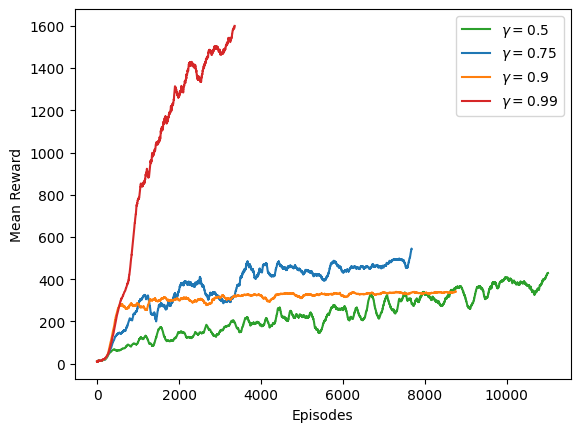

In [66]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

plt.plot(mean_rewards[17], color='tab:green', label=r'$\gamma=0.5$')
plt.plot(mean_rewards[18], color='tab:blue', label=r'$\gamma=0.75$')
plt.plot(mean_rewards[19], color='tab:orange', label=r'$\gamma=0.9$')
plt.plot(mean_rewards[20], color='tab:red', label= r'$\gamma=0.99$')

# plt.plot(rewards[17], color='tab:green', alpha=0.2)
# plt.plot(rewards[18], color='tab:blue', alpha=0.2)
# plt.plot(rewards[19], color='tab:orange', alpha=0.2)
# plt.plot(rewards[20], color='tab:red', alpha=0.2)

plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.legend(), 
plt.show()


# alpha $\alpha$

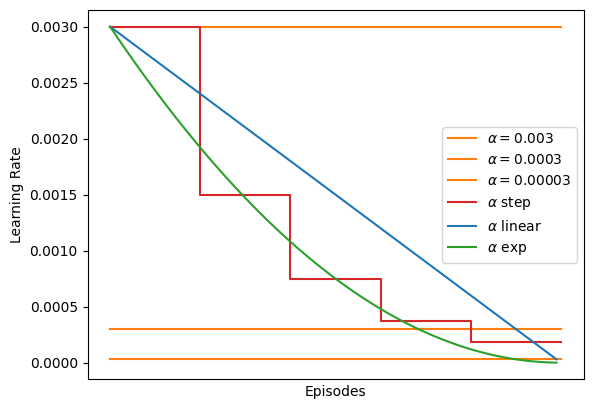

In [67]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

a=1
alpha_const = 0.003
t = np.arange(0,1,0.01)

plt.plot([0,1],[alpha_const,alpha_const], color='tab:orange', label=r'$\alpha=0.003$')
plt.plot([0,1],[alpha_const/10,alpha_const/10], color='tab:orange', label=r'$\alpha=0.0003$')
plt.plot([0,1],[alpha_const/100,alpha_const/100], color='tab:orange', label=r'$\alpha=0.00003$')
plt.plot([0,0.2,0.2,0.4,0.4,0.6,0.6,0.8,0.8,1],[alpha_const,alpha_const,alpha_const/2,alpha_const/2,alpha_const/4,alpha_const/4,alpha_const/8,alpha_const/8,alpha_const/16,alpha_const/16], color='tab:red', label=r'$\alpha$ step')
plt.plot(t,0.003-0.003*t, color='tab:blue', label=r'$\alpha$ linear')
plt.plot(t, 0.003*(t-1)**2, color='tab:green', label=r'$\alpha$ exp')
plt.xticks([])
plt.xlabel('Episodes')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

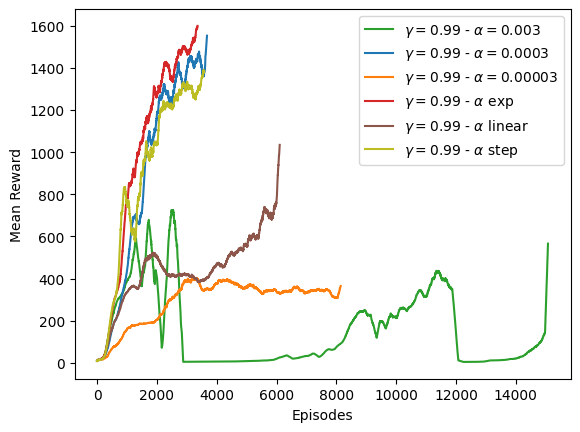

In [68]:
plt.plot(mean_rewards[12], color='tab:green',     label= r'$\gamma=0.99$ - $\alpha=0.003$')
plt.plot(mean_rewards[3], color='tab:blue',    label= r'$\gamma=0.99$ - $\alpha=0.0003$')
plt.plot(mean_rewards[16], color='tab:orange',  label= r'$\gamma=0.99$ - $\alpha=0.00003$')
plt.plot(mean_rewards[20], color='tab:red',   label= r'$\gamma=0.99$ - $\alpha$ exp')
plt.plot(mean_rewards[29], color='tab:brown',   label= r'$\gamma=0.99$ - $\alpha$ linear')
plt.plot(mean_rewards[33], color='tab:olive',   label= r'$\gamma=0.99$ - $\alpha$ step')

# plt.plot(rewards[12], color='tab:green',  alpha=0.2)
# plt.plot(rewards[3], color='tab:blue',    alpha=0.2)
# plt.plot(rewards[16], color='tab:orange', alpha=0.2)
# plt.plot(rewards[20], color='tab:red',    alpha=0.2)
# plt.plot(rewards[29], color='tab:brown',  alpha=0.2)
# plt.plot(rewards[33], color='tab:olive',  alpha=0.2)
plt.xlabel('Episodes')
plt.ylabel('Mean Reward')
plt.legend()
plt.show()


# 0.0003 or exp 

In [69]:
import numpy as np

# np.size(rewards)
# i=0
# int(rewards[3][i]),  int(rewards[4][i]) 
np.mean((9,10))                       

9.5

fixed_min_len=3351, exp_min_len=3050


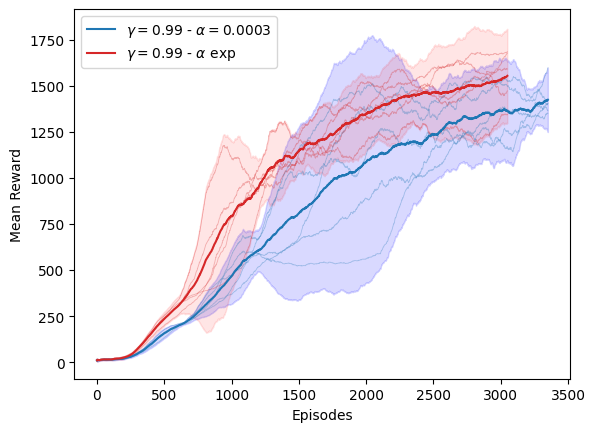

In [70]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt

def plot_train_reward():
    tournaments = 5

    fixed_lr_curves = []
    exp_lr_curves = []
    
    for t in range(tournaments):
        train_log_dir = os.path.join(os.getcwd(), "hyperparams_tuning/logs")
        file = os.path.join(train_log_dir, f"ppo_source_lr0.0003_gamma0.99_{t}.monitor.csv")
        
        with open(file, newline="", encoding="ISO-8859-1") as filecsv:
            lettore = csv.reader(filecsv,delimiter=";")
            next(lettore) #skip header
            next(lettore)
            reward = []
            mean_reward = []
            for i, row in enumerate(lettore):
                r = float(row[0].split(',')[0])
                reward.append(r)
                r_mean = np.mean(reward[max(0, i-200):])
                mean_reward.append(r_mean)
            fixed_lr_curves.append(mean_reward)

    for t in range(tournaments):
        train_log_dir = os.path.join(os.getcwd(), "hyperparams_tuning/logs")
        file = os.path.join(train_log_dir, f"ppo_source_lrexp_scheduler_gamma0.99_{t}.monitor.csv")
        
        with open(file, newline="", encoding="ISO-8859-1") as filecsv:
            lettore = csv.reader(filecsv,delimiter=";")
            next(lettore) #skip header
            next(lettore)
            reward = []
            mean_reward = []
            for i, row in enumerate(lettore):
                r = float(row[0].split(',')[0])
                reward.append(r)
                r_mean = np.mean(reward[max(0, i-200):])
                mean_reward.append(r_mean)
            exp_lr_curves.append(mean_reward)

    fixed_min_len = len(fixed_lr_curves[0])
    for c in fixed_lr_curves:
        if len(c) < fixed_min_len:
            fixed_min_len = len(c)

    exp_min_len = len(exp_lr_curves[0])
    for c in exp_lr_curves:
        if len(c) < exp_min_len:
            exp_min_len = len(c)

    print(f"{fixed_min_len=}, {exp_min_len=}")

    fixed_lr_data = []
    exp_lr_data = []

    for c in fixed_lr_curves:
        fixed_lr_data.append(c[:fixed_min_len])

        # HERE ARE PLOTTED ALL CURVES
        plt.plot(c[:fixed_min_len], color="tab:blue", alpha=0.3, linewidth=0.6)

        

    for c in exp_lr_curves:
        exp_lr_data.append(c[:exp_min_len])

        # HERE ARE PLOTTED ALL CURVES
        plt.plot(c[:exp_min_len], color='tab:red', alpha=0.3, linewidth=0.6)


    fixed_lr_data = np.array(fixed_lr_data)
    exp_lr_data = np.array(exp_lr_data)

    fixed_lr_mean = np.mean(fixed_lr_data.T, axis=1)
    exp_lr_mean = np.mean(exp_lr_data.T, axis=1)

    fixed_lr_std = np.std(fixed_lr_data.T, axis=1)
    exp_lr_std = np.std(exp_lr_data.T, axis=1)


    # HERE ARE PLOTTED MEAN CURVES
    plt.plot(fixed_lr_mean, color="tab:blue",  label= r'$\gamma=0.99$ - $\alpha=0.0003$')
    plt.plot(exp_lr_mean, color="tab:red",  label= r'$\gamma=0.99$ - $\alpha$ exp')
    plt.fill_between(range(fixed_min_len), fixed_lr_mean - 1.96 * fixed_lr_std, fixed_lr_mean + 1.96 * fixed_lr_std, color="blue", alpha=0.15, label="")
    plt.fill_between(range(exp_min_len), exp_lr_mean - 1.96 * exp_lr_std, exp_lr_mean + 1.96 * exp_lr_std, color="red", alpha=0.1, label="")
    plt.legend()
    plt.ylabel('Mean Reward')
    plt.xlabel('Episodes')
    plt.show()

plot_train_reward()

# HEATMAP

[[ 344.  521.  275.  471.  466.  531.]
 [ 425.  523.  665.  663.  486.  425.]
 [ 485.  441.  769.  346.  980.  346.]
 [ 968. 1719.  427. 1672. 1247. 1449.]]


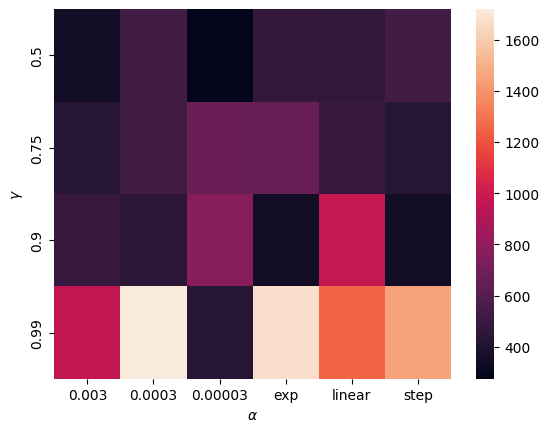

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test_log_dir = os.path.join(os.getcwd(), "hyperparams_tuning/test_logs")
file_paths = [
    os.path.join(test_log_dir, "ppo_source_lr0.003_gamma0.5.txt"),
    os.path.join(test_log_dir, "ppo_source_lr0.003_gamma0.75.txt"),
    os.path.join(test_log_dir, "ppo_source_lr0.003_gamma0.9.txt"),
    os.path.join(test_log_dir, "ppo_source_lr0.003_gamma0.99.txt"),

    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.5.txt"),
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.75.txt"),
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.9.txt"),
    os.path.join(test_log_dir, "ppo_source_lr0.0003_gamma0.99.txt"),

    os.path.join(test_log_dir, "ppo_source_lr3e-05_gamma0.5.txt"),
    os.path.join(test_log_dir, "ppo_source_lr3e-05_gamma0.75.txt"),
    os.path.join(test_log_dir, "ppo_source_lr3e-05_gamma0.9.txt"),
    os.path.join(test_log_dir, "ppo_source_lr3e-05_gamma0.99.txt"),

    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.5.txt"),
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.75.txt"),
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.9.txt"),
    os.path.join(test_log_dir, "ppo_source_lrexp_scheduler_gamma0.99.txt"),

    os.path.join(test_log_dir, "ppo_source_lrlin_scheduler_gamma0.5.txt"),
    os.path.join(test_log_dir, "ppo_source_lrlin_scheduler_gamma0.75.txt"),
    os.path.join(test_log_dir, "ppo_source_lrlin_scheduler_gamma0.9.txt"),
    os.path.join(test_log_dir, "ppo_source_lrlin_scheduler_gamma0.99.txt"),

    os.path.join(test_log_dir, "ppo_source_lrstep_scheduler_gamma0.5.txt"),
    os.path.join(test_log_dir, "ppo_source_lrstep_scheduler_gamma0.75.txt"),
    os.path.join(test_log_dir, "ppo_source_lrstep_scheduler_gamma0.9.txt"),
    os.path.join(test_log_dir, "ppo_source_lrstep_scheduler_gamma0.99.txt")
]
def read_file(file):
    file = open(file, 'r')
    content = file.read()

    mean = re.search(r'\d+\.\d+', content.split("\n")[2]).group()
    var = re.search(r'\d+\.\d+', content.split("\n")[3]).group()

    file.close()
    return int(float(mean)), int(float(var))

rewards = []
mean_rewards = []
len_rewards = []
num_alpha = 6
num_gamma = 4
heat = np.zeros((num_gamma,num_alpha))

x = 0
for j in range(num_alpha):
    for i in range(num_gamma):
        reward, _ = read_file(file_paths[x])
        x+=1
        heat[ i, j ] = reward



sns.heatmap(heat)
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$\gamma$')
plt.xticks([0.5,1.5,2.5,3.5,4.5,5.5],['0.003','0.0003','0.00003','exp','linear','step'])
plt.yticks([0.5,1.5,2.5,3.5],['0.5','0.75','0.9','0.99'])
print(heat)


# BAYRN UDR JSON 

In [124]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np


def results_json_opener(file, plot=False, order=-1): #order -1 = crescante
    n_print = 5
    with open(file, 'r') as f:
        data = json.load(f)
    if plot:
        plt.plot([d['target_outcome'] for d in data], 'o-', alpha=0.8)
        plt.plot( [d['target_outcome'] for d in data[:5]], 'g*')
        plt.plot(range(5,len(data)), [d['target_outcome'] for d in data[5:]], 'r*')
        plt.axhline(y=LOWER_BOUND, color='black', linestyle='--', linewidth=1, label='Lower Bound')
        plt.axhline(y=UPPER_BOUND, color='red', linestyle='--', linewidth=1, label='Upper Bound')
        plt.xlabel('BayRn Iterations')
        plt.ylabel('Mean Reward on Target Domain')
        plt.legend()
        plt.show()
    data = sorted(data, key=lambda d: order*d['target_outcome'])
    # best = max(data, key=lambda d: d['target_outcome'])
    print('target_outcome and params (sorted by target_outcome):')
    [print(f"{round(float(d['target_outcome']), 1)} {round(float(d['target_outcome_var']),1)} {[round(float(p), 3) for p in d['params']]}") for d in data[:n_print]]
    print('='*60)

print('bayrn_ei')
file = os.path.join(os.getcwd(), "bayrn_results/bayrn_ei/data.json")
results_json_opener(file)

print('bayrn_nei')
file = os.path.join(os.getcwd(), "bayrn_results/bayrn_nei/data.json")
results_json_opener(file)

print('bayrn_udr_ei')
file = os.path.join(os.getcwd(), "bayrn_results/bayrn_udr_ei/data.json")
results_json_opener(file)

print('bayrn_udr_nei')
file = os.path.join(os.getcwd(), "bayrn_results/bayrn_udr_nei/data.json")
results_json_opener(file)



bayrn_ei
target_outcome and params (sorted by target_outcome):
652.8 37.3 [3.533, 8.72, 7.405, 2.748, 6.292, 1.323]
659.4 8.2 [3.221, 4.407, 9.824, 3.142, 2.221, 1.274]
664.2 27.3 [2.113, 8.359, 0.979, 3.14, 1.298, 3.325]
669.0 23.0 [1.66, 6.507, 6.276, 3.344, 1.177, 6.054]
675.2 270.5 [8.86, 7.341, 7.508, 2.387, 6.213, 2.177]
bayrn_nei
target_outcome and params (sorted by target_outcome):
228.1 46.6 [5.955, 9.861, 1.891, 3.497, 1.94, 3.307]
479.9 106.8 [2.468, 6.402, 0.81, 0.881, 1.537, 5.683]
538.9 8.5 [1.083, 2.619, 7.253, 0.955, 1.294, 2.84]
546.6 27.3 [5.544, 9.76, 4.937, 6.039, 2.642, 0.731]
640.3 24.8 [2.375, 8.928, 5.463, 5.495, 2.004, 3.464]
bayrn_udr_ei
target_outcome and params (sorted by target_outcome):
786.3 78.5 [0.869, 1.744, 0.333]
786.6 39.7 [0.901, 4.061, 1.451]
813.0 110.3 [0.246, 1.844, 0.42]
882.5 147.0 [4.36, 4.899, 3.544]
898.0 60.5 [1.624, 3.975, 3.765]
bayrn_udr_nei
target_outcome and params (sorted by target_outcome):
758.8 2.4 [2.737, 2.614, 7.324]
797.2 39.